Chi-Squared:
account_status 101.110632073
credit_history 54.5766536467
purpose 20.7739220633
savings_account 26.796923798
employment 13.5903144793
sex 5.97559264917
status 8.86148640272
other_debtors/guarantors 7.8471156459
property 20.0334631225
other_installment_plans 5.79265961647
housing 16.9267541705
job 1.10412043403
telephone 0.577581439703
foreign 4.02448444549
fraud 4.02448444549


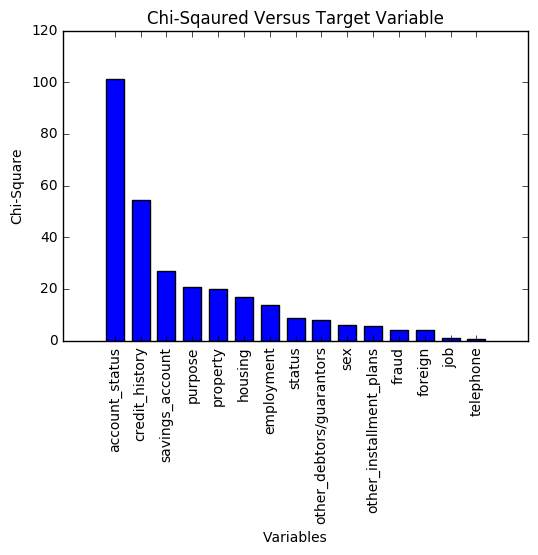

Feature ranking:
1. credit_amount (0.171407)
2. account_status (0.138059)
3. duration(months) (0.133538)
4. savings_account (0.070767)
5. age (0.063520)
6. credit_history (0.063012)
7. purpose (0.061248)
8. property (0.045467)
9. telephone (0.033321)
10. other_debtors/guarantors (0.032429)
11. installment_rate (0.032151)
12. employment (0.029699)
13. residence (0.028027)
14. existing_credits (0.025447)
15. job (0.019817)
16. status (0.019766)
17. other_installment_plans (0.013815)
18. people_liable (0.007186)
19. sex (0.006832)
20. housing (0.004491)
21. foreign (0.000000)


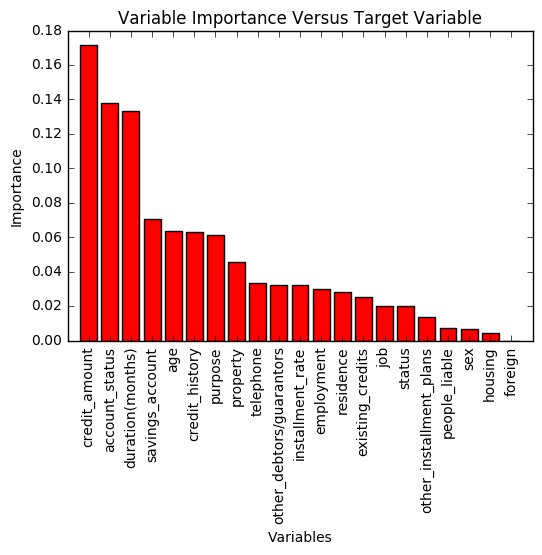

In [1]:
# Imports
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


def explore(file, numfile, target):
    
    # Importing the files
    df = pd.read_csv(file)
    numdf = pd.read_csv(numfile)
    
    # Sorting the columns between nominal and interval
    nominal = []
    interval = []

    for column in df:
        if df[column].dtype == np.int64 and column != 'fraud':
            interval.append(column)
        else:
            nominal.append(column)        
            
    # Display a Chi-Squared chart if the target variable is nominal        
    if target in nominal:
        chi = []
        print('Chi-Squared:')
        for column in nominal:
            try:
                tab = pd.crosstab(index=numdf[target], columns=numdf[column])
            except KeyError:
                pass
            chi2 = chi2_contingency(tab)[0]
            chi.append(chi2)
            print(column, chi2)

        indices = np.argsort(chi)[::-1]

        columns= []
        for i in indices:
            name = nominal[i]
            columns.append(name)

        x = []
        y = sorted(chi, reverse=True)
        for i in range(len(y)):
            x.append(i)
        plt.bar(x, y, width=0.7, align='center')
        plt.xticks(x, columns, rotation=90)
        plt.xlabel('Variables')
        plt.ylabel('Chi-Square')
        plt.title('Chi-Sqaured Versus Target Variable')
        plt.show()
    else:
        # Display a correlation bar chat if the target variable is interval
        corr = []
        print('Variable Correlations:')
        for i in interval:
            print(i, df[i].corr(df[target]))
            corr.append(df[i].corr(df[target]))
            
        y = corr
        x = []
        for i in range(len(y)):
            x.append(i)
        plt.bar(x, y, width=0.7, align='center')
        plt.xticks(x, interval, rotation=90)
        plt.xlabel('Variables')
        plt.ylabel('Correlation')
        plt.title('Correlation Versus Target Variable')
        plt.show()

    ## Variable importance section
    # Our variables for the classification task turned into numpy arrays(vectors?)
    X = np.array(numdf.drop([target], 1))
    y = np.array(numdf[target])

    # Build a decision tree and compute the variables importances
    # clf = ExtraTreesClassifier(n_estimators=250, random_state=0)
    clf = DecisionTreeClassifier(random_state=0)

    # Fitting the decision tree
    clf.fit(X, y)
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    columns = []
    for i in indices:
        name = numdf.columns[i]
        columns.append(name)

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. %s (%f)" % (f + 1, columns[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Variable Importance Versus Target Variable")
    plt.xlabel('Variables')
    plt.ylabel('Importance')
    plt.bar(range(X.shape[1]), importances[indices], color='r', align="center")
    plt.xticks(range(X.shape[1]), columns, rotation='90')
    plt.xlim([-1, X.shape[1]])
    plt.show()

explore('data/german_data_train.csv', 'data/german_num_data_train.csv', 'fraud')

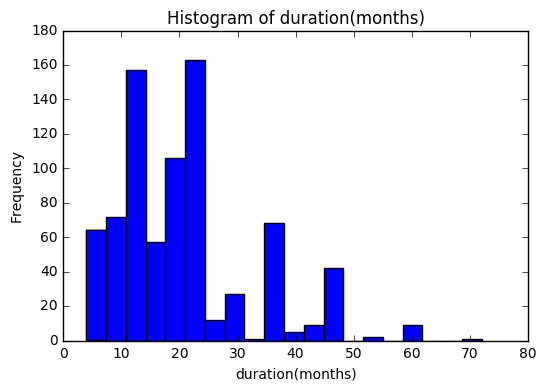

In [2]:
# Histogram showing the distribution of a given variable
def hist(df, target, bins):
    df = pd.read_csv(df)
    x = df[target]
    plt.hist(x, bins=bins)
    plt.title('Histogram of %s' % (target))
    plt.xlabel(target)
    plt.ylabel('Frequency')
    plt.show()
    
hist('data/german_data_train.csv', 'duration(months)', 20)

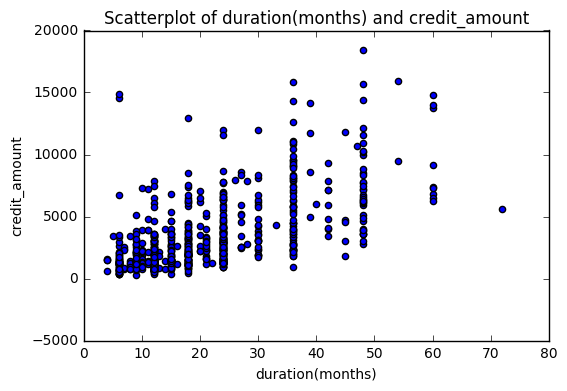

In [3]:
# Creating a scatter plot to show the relationship between two given variables
def scatter(df, xvar, yvar):
    df = pd.read_csv(df)
    x = df[xvar]
    y = df[yvar]
    plt.scatter(x, y)
    plt.xlabel(xvar)
    plt.ylabel(yvar)
    plt.title('Scatterplot of %s and %s' % (xvar, yvar))
    plt.show()
    
scatter('data/german_data_train.csv', 'duration(months)', 'credit_amount')